In [1]:
import numpy as np
import pandas as pd

# Linear Models, their CV and Statsmods
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix

In [44]:
# Pre-processing packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
# Ensembling Techniques
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
# boosting Techniques
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [6]:
import time
import pickle

# Graph-Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'axes.grid' : False})  # So that your grids have no axis

%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
seed = 69 # Set the random seed for the entire document

In [9]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
# Renaming Columns 

# SEX changed to GENDER
# PAY_0 changed to PAY_1
# default.payment.next.month is too long and changed to simple word, DEFAULT
df.rename(columns={'SEX':'GENDER',
                   'PAY_0':'PAY_1',
                   'default.payment.next.month':'DEFAULT',} , inplace=True)

df.drop('ID', axis=1, inplace=True) # Drop column ID

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   GENDER     30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## _Variable Breakdown_  
  
**DEFAULT**: Default payment next month (1 = yes, 0 = no)
  
**LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**GENDER:** Gender (1 = male; 2 = female).

**EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE:** Marital status (1 = married; 2 = single; 3 = others).

**AGE:** Age (current age).

**PAY_1 to PAY_6: History of past payment**  
The past monthly payment records (from April to September, 2005) as follows:  
PAY_1 = Repayment status in September, 2005  
PAY_2 = Repayment status in August, 2005;<br>
PAY_3 = Repayment status in July, 2005;<br> 
PAY_4 = Repayment status in June, 2005;<br>
PAY_5 = Repayment status in May, 2005;<br>
PAY_6 = Repayment status in April, 2005.    
  
------------------
The measurement scale for the repayment status is:  
-2 = no consumption;  
-1 = pay duly;  
1 = payment delay for one month;  
2 = payment delay for two months;  
3 = payment delay for three months;<br>
4 = payment delay for four months;<br>
5 = payment delay for five months;<br> 
6 = payment delay for six months;<br> 
7 = payment delay for seven months;  
8 = payment delay for eight months;  
9 = payment delay for nine months and above.  

------------------

**BILL_AMT1 to BILL_AMT6:** Amount of bill statement (New Taiwan dollar).   
BILL_AMT1 = amount of bill statement in September, 2005;  
BILL_AMT2 = amount of bill statement in August, 2005;  
BILL_AMT3 = amount of bill statement in July, 2005;<br>
BILL_AMT4 = amount of bill statement in June, 2005;<br>
BILL_AMT5 = amount of bill statement in May, 2005;<br>
BILL_AMT6 = amount of bill statement in April, 2005.

**PAY_AMT1 to PAY_AMT6:** Amount of payment for previous month (New Taiwan dollar).  
PAY_AMT1 = amount paid in September, 2005;  
PAY_AMT2 = amount paid in August, 2005;  
PAY_AMT3 = amount paid in July, 2005;<br>
PAY_AMT4 = amount paid in June, 2005;<br>
PAY_AMT5 = amount paid in May, 2005;<br>
PAY_AMT6 = amount paid in April, 2005.

In [13]:
# understanding the statistics of data
df.describe()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Checking for Null Values**

In [14]:
# Checking for Null Values
df.isnull().sum()

LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

##  1.Data Cleaning

In [15]:
print('Categories in Education Column: ', df['EDUCATION'].unique())

Categories in Education Column:  [2 1 3 5 4 6 0]


In [16]:
# Here we have 0,5,6 which are considered as unknown categories. 
# So Consider them as others

**EDUCATION:**  
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

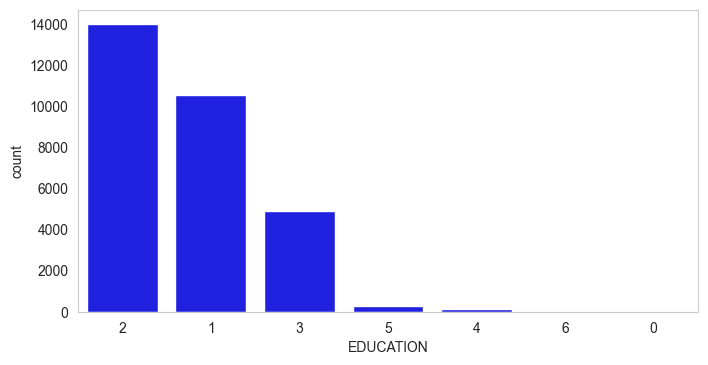

In [17]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='blue')
plt.show()

In [18]:
# Changing 0,5,6 to others i.e 4
## Changes every value of x not within (and inclusive of) 1 ~ 3 to 4
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: x 
                                        if ((x > 0 and x< 4)) 
                                        else 4)   

# Corrected changes
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

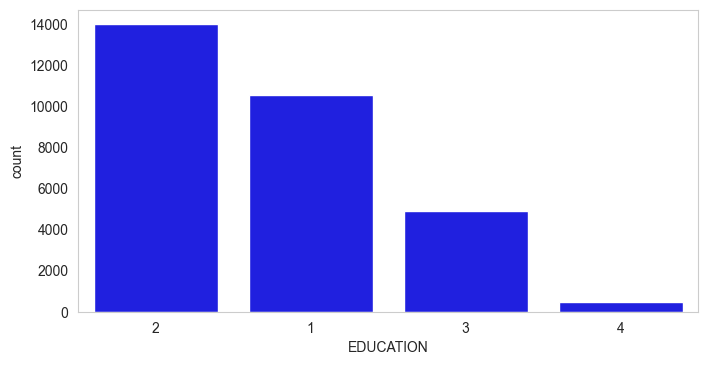

In [19]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='blue')
plt.show()

In [20]:
# from describe() we see that min is 0 does not make any sense

**MARRIAGE:**  
Marital status (1 = married; 2 = single; 3 = others).

In [21]:
# So changing the 0 which is undefined to others
# changes every value of x not within (and inclusive of) 1 and 2 to 3
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: x
                                     if (x > 0 and x < 3)
                                     else 3) 
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

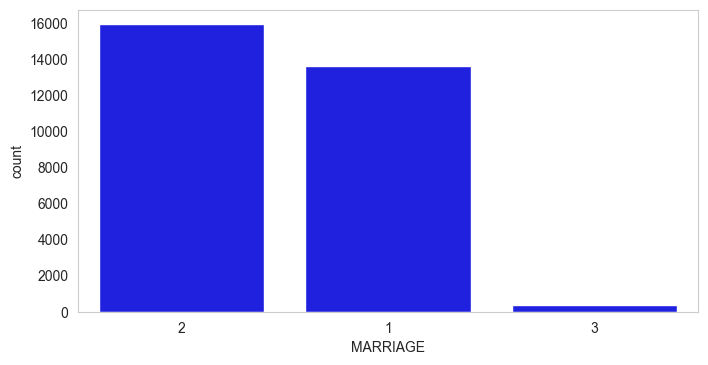

In [22]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df, x='MARRIAGE', order = df['MARRIAGE'].value_counts().index, color='blue')
plt.show();

## 2.Data Exploration

In [23]:
print(df['DEFAULT'].value_counts(),'\n')
print(len(df['DEFAULT']))

0    23364
1     6636
Name: DEFAULT, dtype: int64 

30000


In [24]:
# As you can see out of 30000 rows 23364 are non-defaults and 6636 are defaults

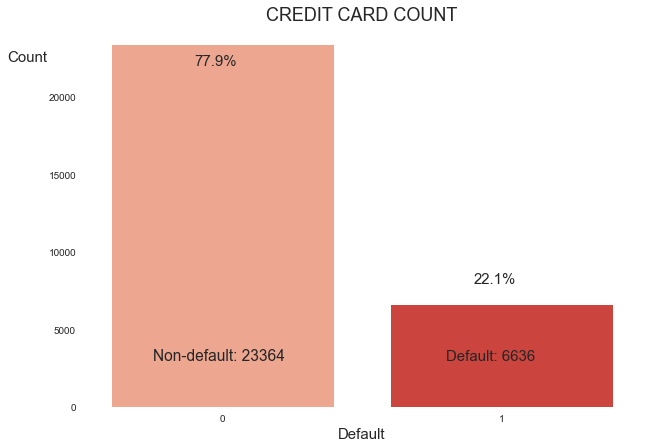

In [25]:
# Frequency of the defaults
default = df['DEFAULT'].sum() # adds up all the default cases in the df
no_default = len(df['DEFAULT']) - default  # entire dataset - default cases

# Percentage of the defaults
default_perc = round(default/len(df['DEFAULT']) * 100, 1)
no_default_perc = round(no_default/len(df['DEFAULT']) * 100, 1)

# Plotting Target
fig, ax = plt.subplots(figsize=(10,7))  # Sets size of graph
sns.set_context('notebook', font_scale=1.2)  # Affects things like size of label, lines and other elements of the plot.

sns.countplot('DEFAULT',data=df, palette="Reds")   
plt.annotate('Non-default: {}'.format(no_default), 
             xy=(-0.25, 3000), # xy = (x dist from 0, y dist from 0)
            size=15.5)

plt.annotate('Default: {}'.format(default), 
             xy=(0.8, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 22000),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.9, 8000),size=15)
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel("Default",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40, # Adjusts distance of the title from the graph
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)

plt.box(False)        # Removes the bounding area
plt.savefig('target_classification_skew.png', transparent = True)

### **Performing the Frequency Distribution of below features for Default or Not**
<b><p> The features are</p></b>
**GENDER:** Gender (1 = male; 2 = female).

**EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE:** Marital status (1 = married; 2 = single; 3 = others).

**PAY_1 to PAY_6: History of past payment**  
The past monthly payment records (from April to September, 2005) as follows:  
PAY_1 = Repayment status in September, 2005  
PAY_2 = Repayment status in August, 2005;<br>
PAY_3 = Repayment status in July, 2005;<br> 
PAY_4 = Repayment status in June, 2005;<br>
PAY_5 = Repayment status in May, 2005;<br>
PAY_6 = Repayment status in April, 2005.  


In [26]:
# Creating a new dataframe with just the categorical explanatory variables
df_categorical = df[['GENDER', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
                     ,'DEFAULT']]

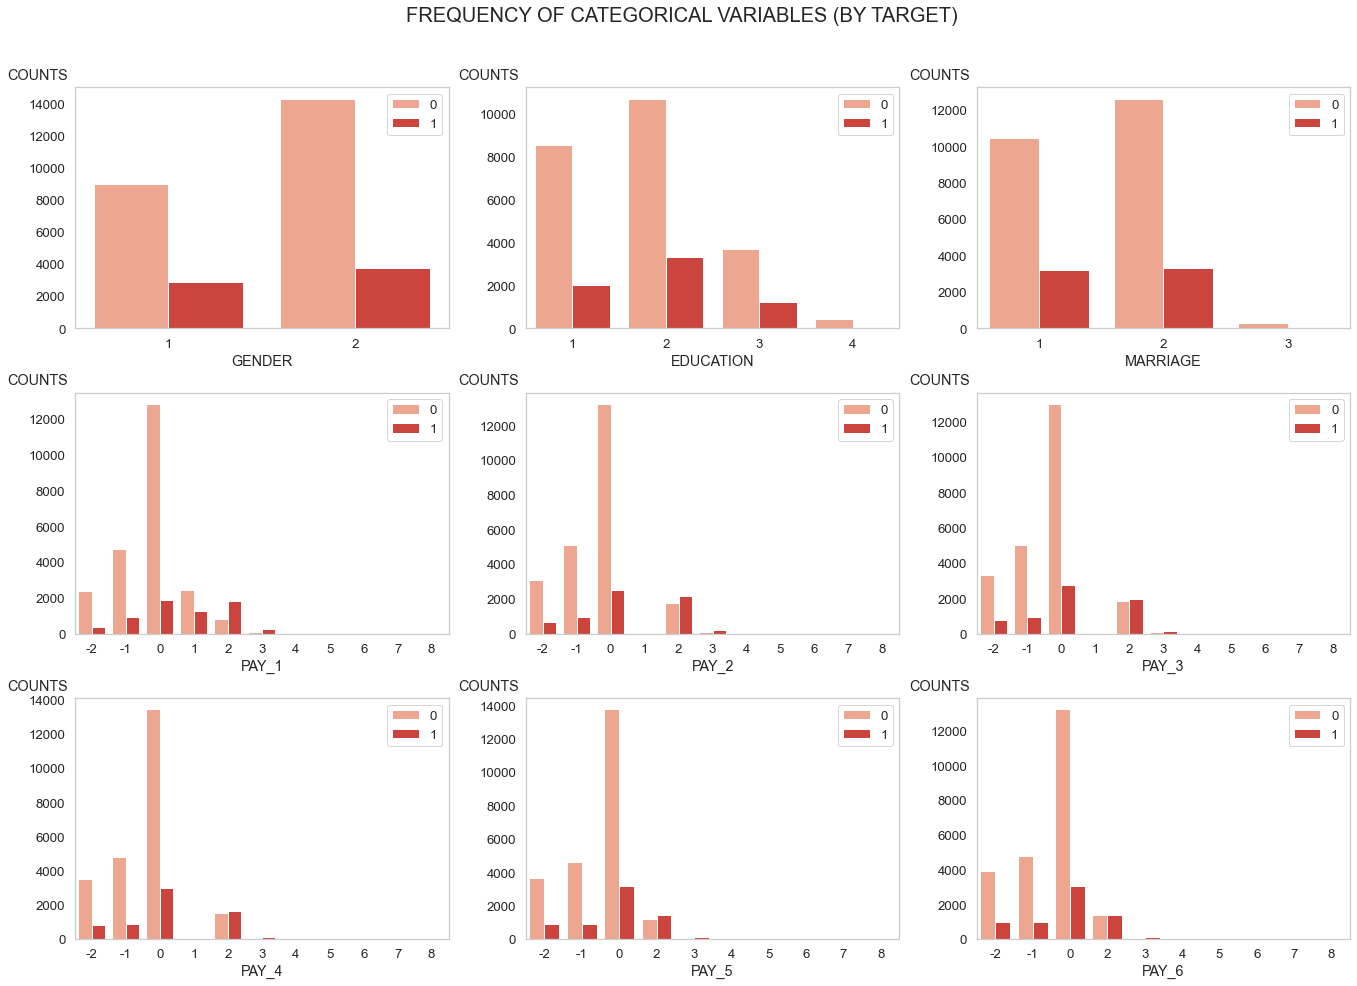

In [27]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='GENDER', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='PAY_1', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

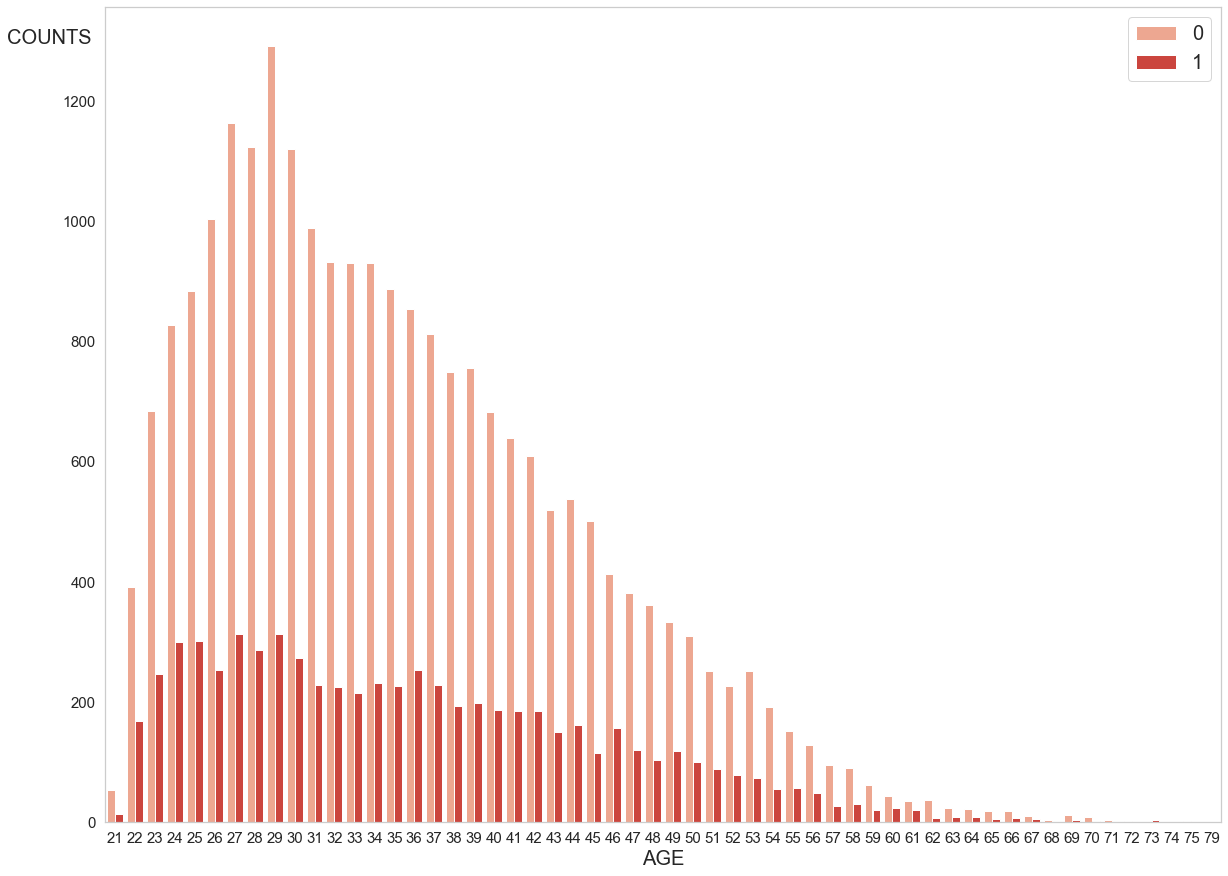

In [28]:
# By Age
fig, ax = plt.subplots(figsize=(20,15))

ax = sns.countplot(x='AGE', hue='DEFAULT', data=df, palette='Reds')


ax.set_ylabel('COUNTS', rotation=0, labelpad=40,size=20)
ax.set_xlabel('AGE', size=20)
ax.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
ax.legend(loc=1,fontsize=20);

ax.tick_params(labelsize=15)  # Changes size of the values on the label

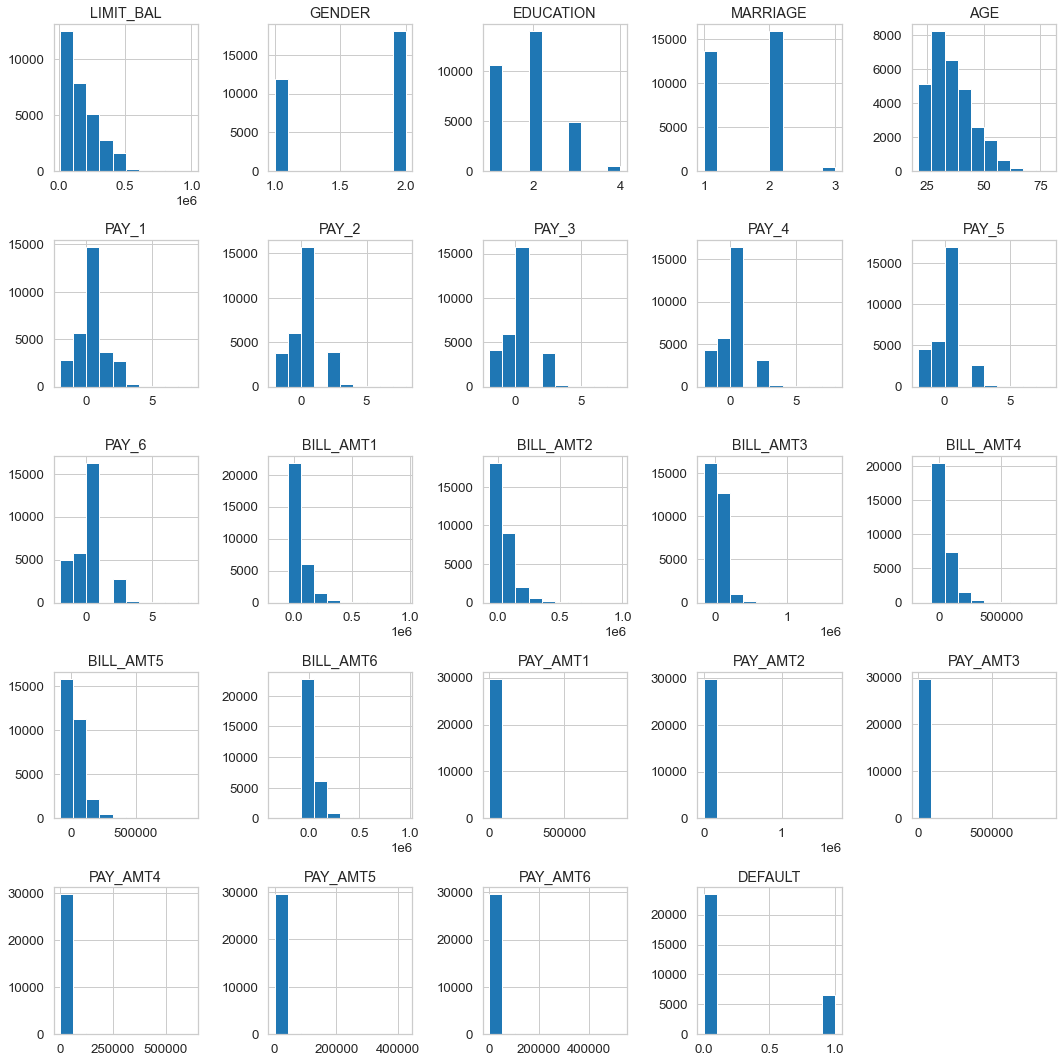

In [29]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

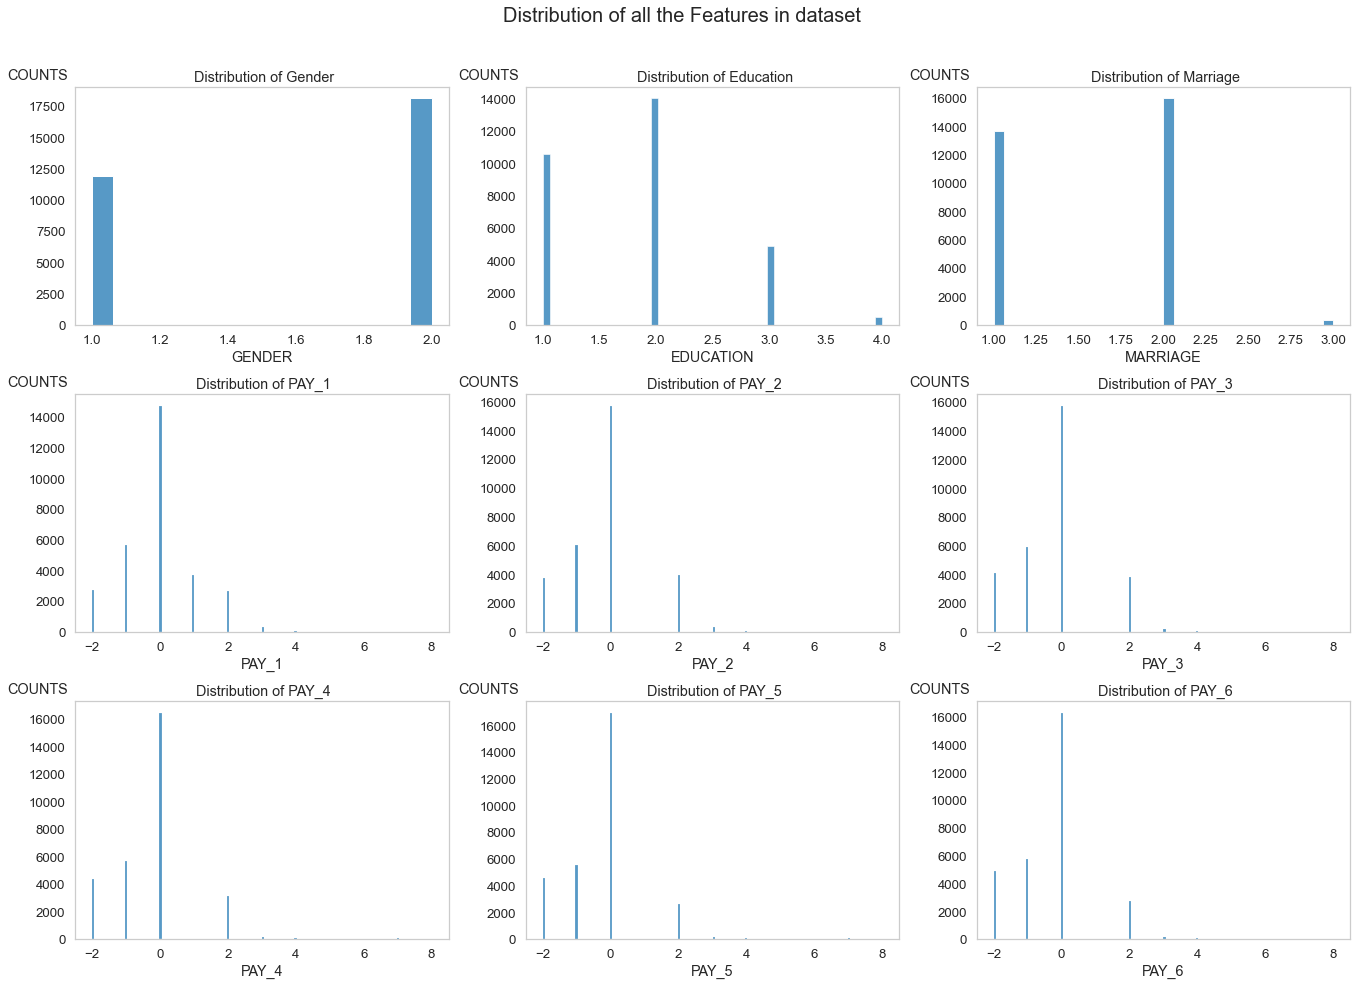

In [30]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("Distribution of all the Features in dataset",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.histplot(x=df['GENDER'], ax=axes[0,0])
ax2 = sns.histplot(x=df['EDUCATION'],ax=axes[0,1])
ax3 = sns.histplot(x=df['MARRIAGE'], ax=axes[0,2])
ax4 = sns.histplot(x=df['PAY_1'],ax=axes[1,0])
ax5 = sns.histplot(x=df['PAY_2'],ax=axes[1,1])
ax6 = sns.histplot(x=df['PAY_3'],ax=axes[1,2])
ax7 = sns.histplot(x=df['PAY_4'],ax=axes[2,0])
ax8 = sns.histplot(x=df['PAY_5'],ax=axes[2,1])
ax9 = sns.histplot(x=df['PAY_6'],ax=axes[2,2])

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)
ax1.set_title(" Distribution of Gender")
ax2.set_title(" Distribution of Education")
ax3.set_title(" Distribution of Marriage")
ax4.set_title(" Distribution of PAY_1")
ax5.set_title(" Distribution of PAY_2")
ax6.set_title(" Distribution of PAY_3")
ax7.set_title(" Distribution of PAY_4")
ax8.set_title(" Distribution of PAY_5")
ax9.set_title(" Distribution of PAY_6")

ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)


# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

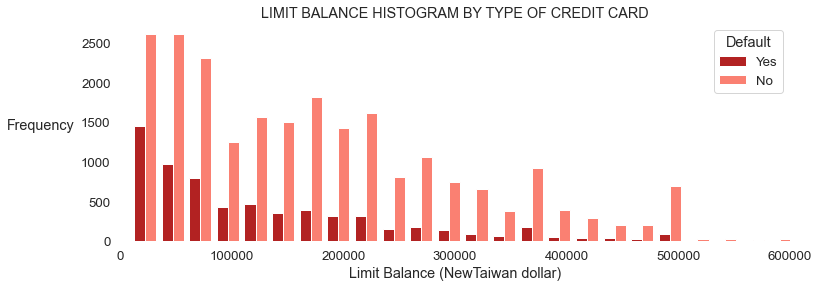

In [32]:
#lIMIT_BALANCE
x1 = list(df[df['DEFAULT'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEFAULT'] == 0]['LIMIT_BAL'])

fig2, ax_lim_bal = plt.subplots(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NewTaiwan dollar)')
plt.ylabel('Frequency', rotation=0,labelpad=40)
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')
plt.box(False)
plt.savefig('Limit_balance', format='png', dpi=200, transparent=True);

## 3.Feature Selection

In [33]:
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

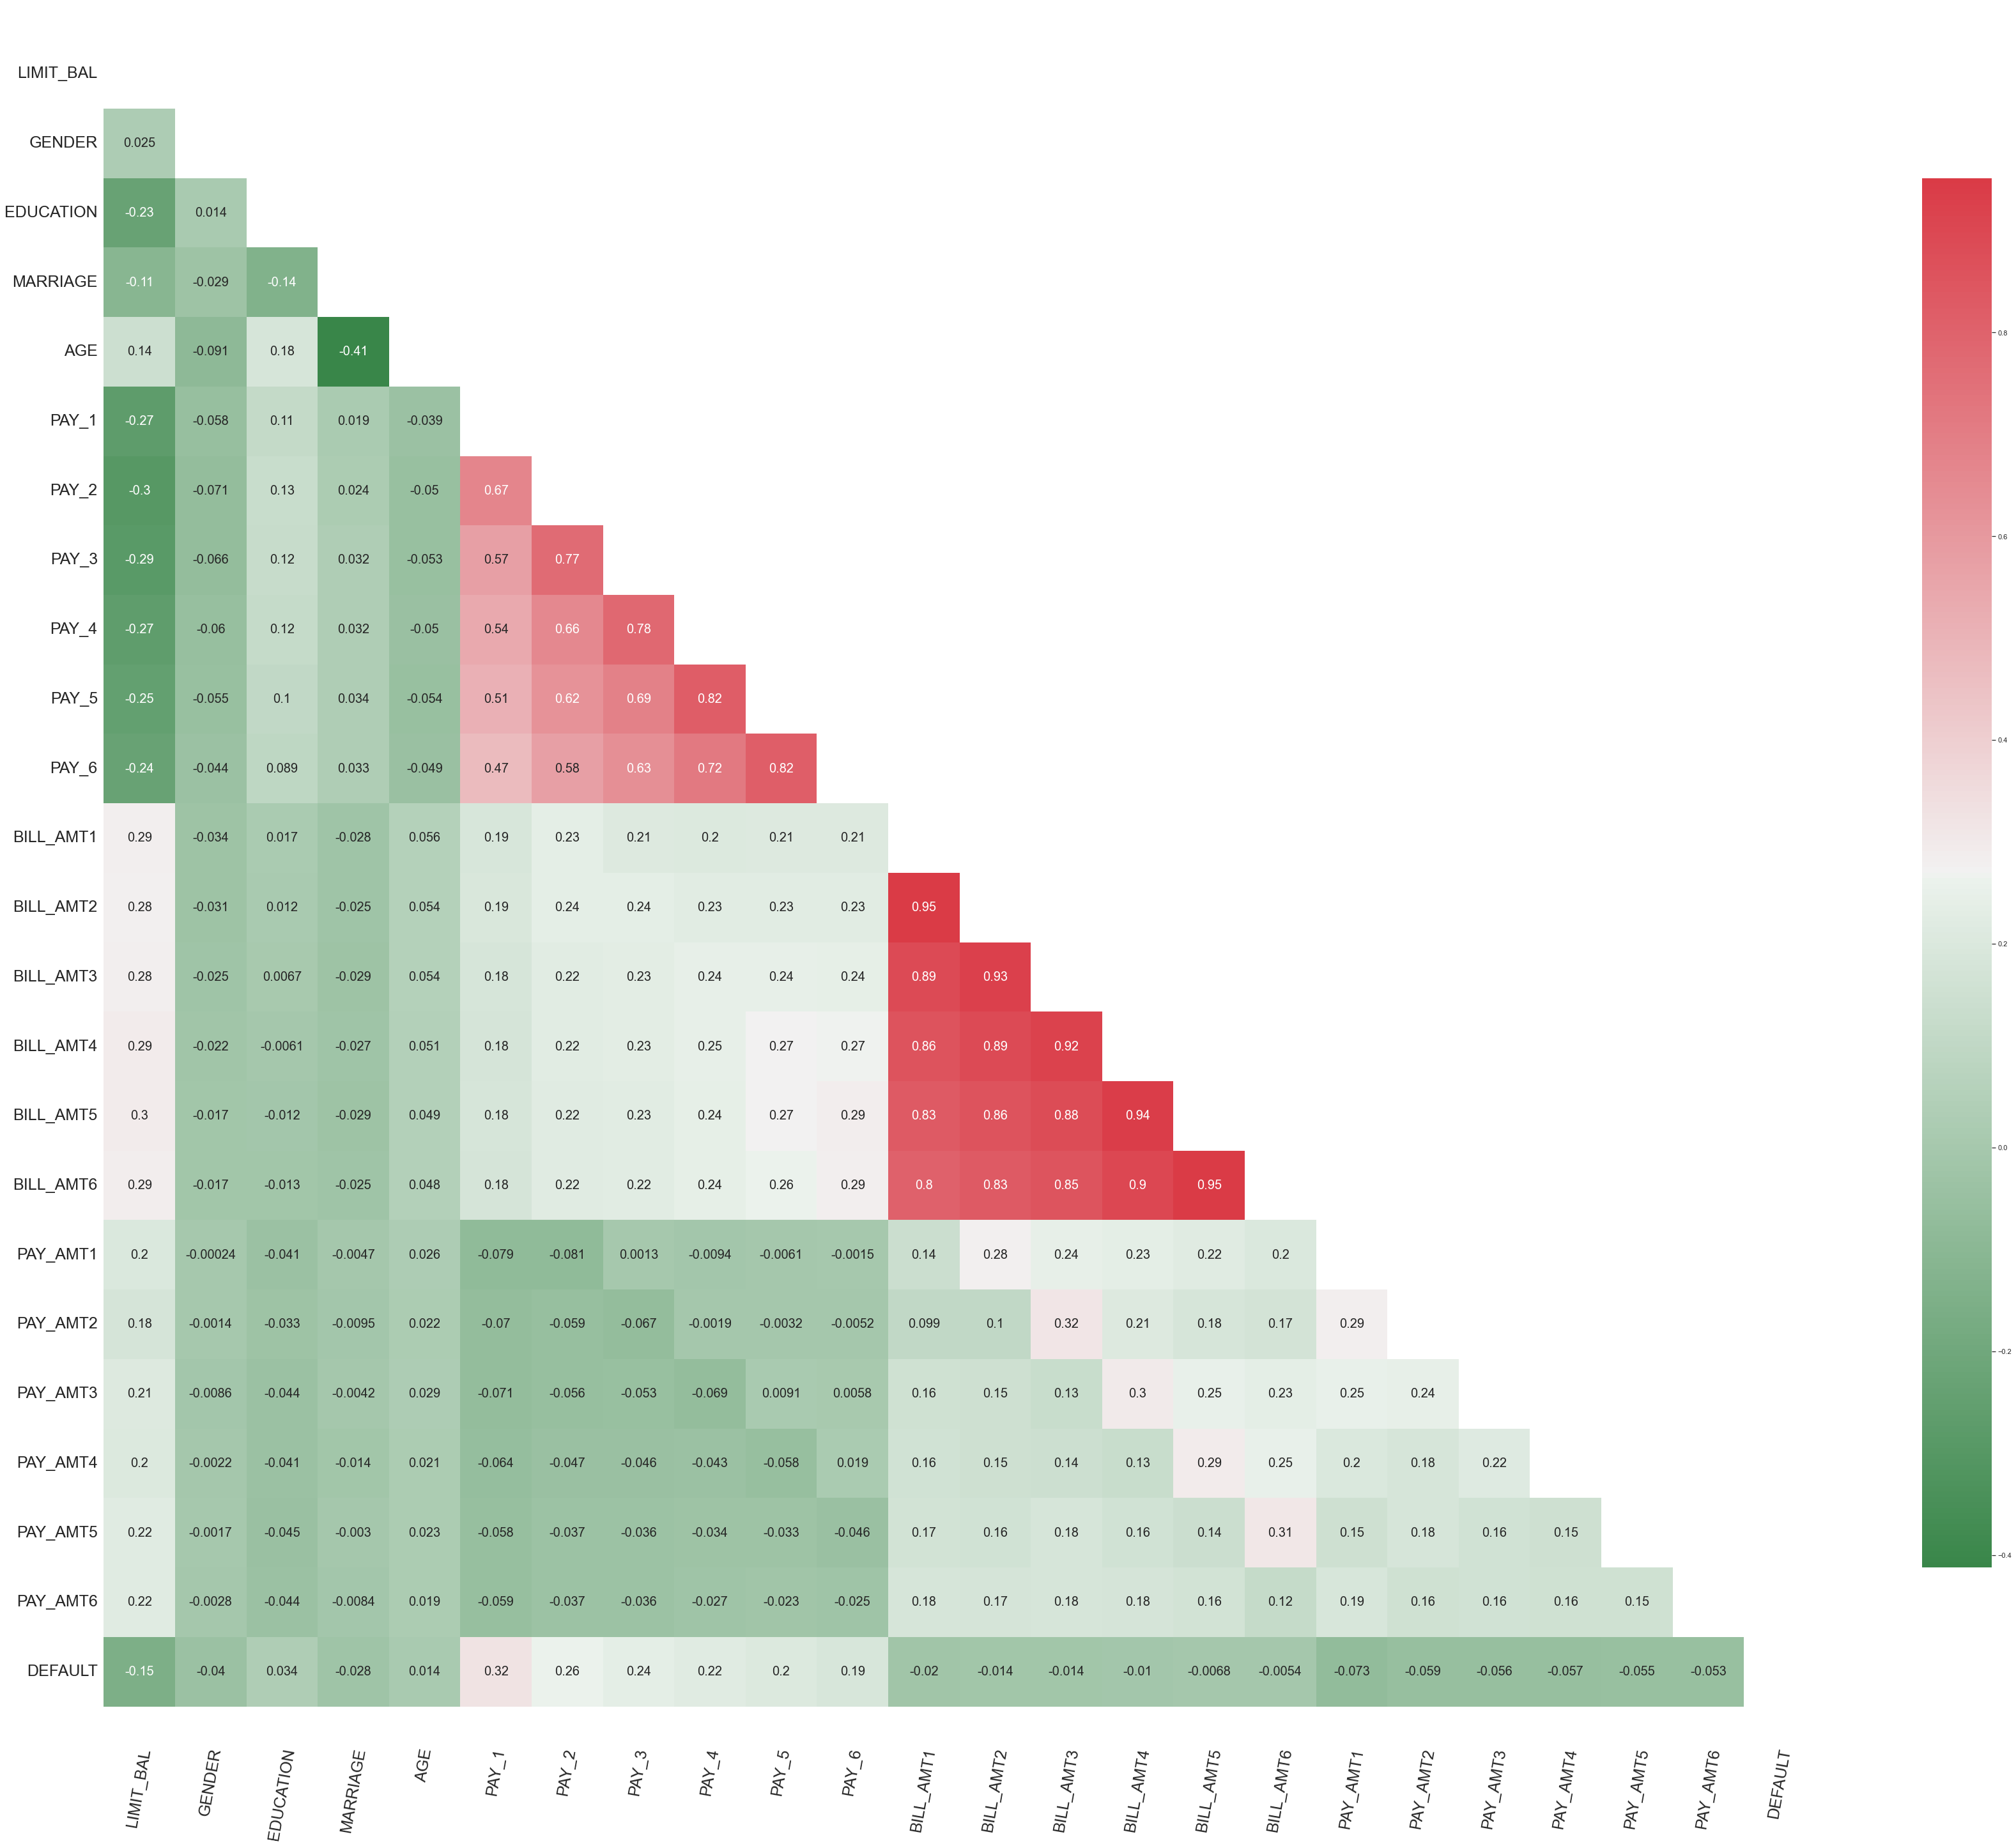

In [34]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               )

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

plt.savefig('correlation_heatmap.png', transparent = True)

<b>With the help of Heat Map. We can say that</b><br>
<b>Green - Low Correlation</b></br>
<b>Red - High Correlation</b>

In [35]:
# printing the correlation of all the features in the dataset with respect to DEFAULT
df_default_corrs = data.iloc[:-1,-1:]
df_default_corrs

,DEFAULT
LIMIT_BAL,-0.153520
GENDER,-0.039961
EDUCATION,0.033842
MARRIAGE,-0.027575
AGE,0.013890
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149


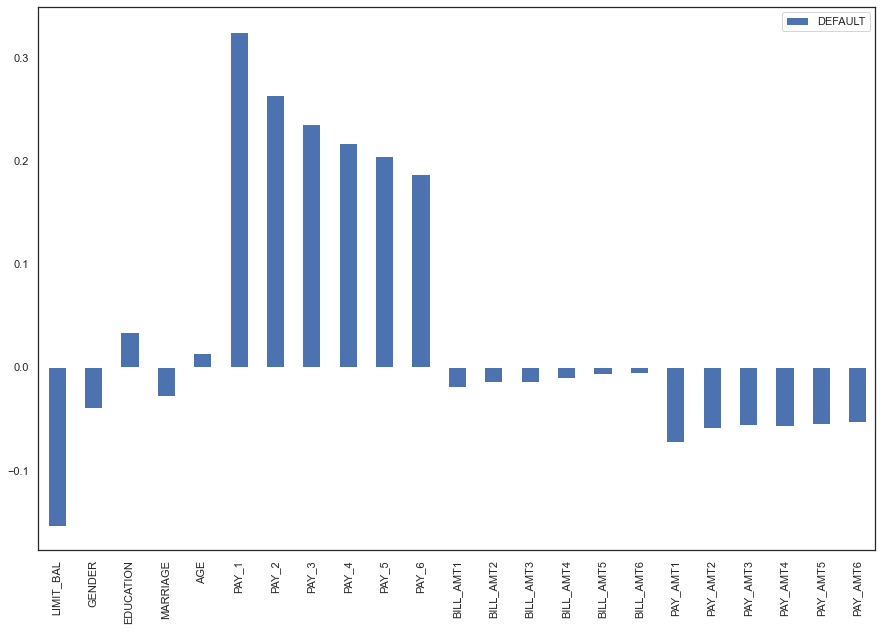

In [36]:
df_default_corrs.plot(kind='bar',figsize=(15,10))
plt.show()

In [37]:
# From the graph we can infer that PAY_1 has the highest Correlation with the DEFAULT

In [38]:
# The value of Correlation is:
data.iloc[:-1,-1:].max()

DEFAULT    0.324794
dtype: float64

## Feature Importance Described by RandomForest

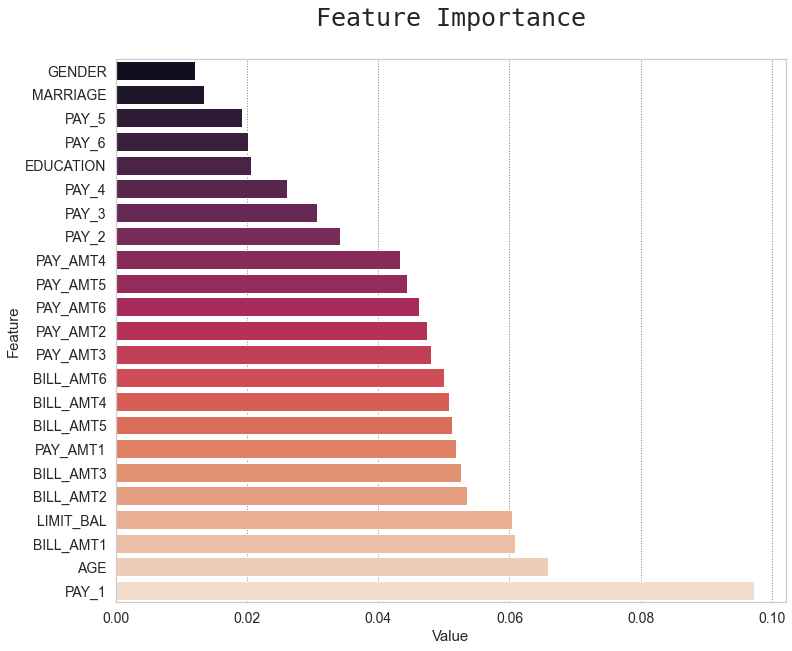

In [39]:
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# Data splitting for 80% Train/Val and 20% Test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=69) # 20% holdout 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=69) # Train/Val

# Initializing the scaler  
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train_val.values)

## Scale the Predictors on the train/val dataset
X_train_val_scaled = std.transform(X_train_val.values) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_train_val_scaled, y_train_val) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature_Importance']).sort_values('Feature_Importance',ascending=True)

# Set seaborn contexts 
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5)
plt.title('Feature Importance', fontname='monospace', fontsize=25, y=1.05)
a=sns.barplot(y=feature_importance.index,x=feature_importance.Feature_Importance,palette='rocket')
plt.xlabel('Value', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [40]:
# getting dummies
df=pd.get_dummies(df,columns=['MARRIAGE','GENDER','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [41]:
defa=df.pop('DEFAULT')
df.insert(87,"DEFAULT",defa)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 88 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   AGE          30000 non-null  int64  
 2   BILL_AMT1    30000 non-null  float64
 3   BILL_AMT2    30000 non-null  float64
 4   BILL_AMT3    30000 non-null  float64
 5   BILL_AMT4    30000 non-null  float64
 6   BILL_AMT5    30000 non-null  float64
 7   BILL_AMT6    30000 non-null  float64
 8   PAY_AMT1     30000 non-null  float64
 9   PAY_AMT2     30000 non-null  float64
 10  PAY_AMT3     30000 non-null  float64
 11  PAY_AMT4     30000 non-null  float64
 12  PAY_AMT5     30000 non-null  float64
 13  PAY_AMT6     30000 non-null  float64
 14  MARRIAGE_1   30000 non-null  uint8  
 15  MARRIAGE_2   30000 non-null  uint8  
 16  MARRIAGE_3   30000 non-null  uint8  
 17  GENDER_1     30000 non-null  uint8  
 18  GENDER_2     30000 non-null  uint8  
 19  EDUC

In [266]:
# import pickle

# with open('dataset_raw_virgin.pickle', 'wb') as to_write:
#     pickle.dump(df, to_write)

In [267]:
# with open('my_dataframe.pickle','rb') as read_file:
#     new_df = pickle.load(read_file)
    
# new_df.head(5)

# Model Building
## Baseline model with No Scaling

The models I have selected to use are:  


1. Logistic Regression
2. K-Nearest Neighbor
3. Naive Bayes Classifier
4. Support Vector Machines (LinearSVC)
5. Decision Trees
6. Random Forest
  
  
Scoring Metrics:
- ROC/AUC
- Precision/Recall 
- F1

In [268]:
## Baseline model performance evaluation

# to give model baseline report with cross-validation in dataframe 
def baseline_report_cv_(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
     
    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


In [269]:
# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale = df_models.drop('index', axis=1)
df_models_no_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.376208,0.246268,0.886994,0.385433,0.644658,0
1,LogisticRegression,0.779375,0.133333,0.000360,0.000719,0.653841,0
2,KNN,0.751292,0.369322,0.180546,0.242448,0.606825,0
3,DecisionTree,0.723167,0.383832,0.405700,0.388858,0.607527,0
4,RandomForest,0.815083,0.646687,0.360253,0.460654,0.763512,0
5,LinearSVC,0.613542,0.234342,0.464356,0.146568,0.572276,0


## BaseLine Model with Scaling

In [270]:
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)


# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.793208,0.638098,0.141431,0.229180,0.737050,0
1,LogisticRegression,0.820292,0.679300,0.352295,0.463811,0.766627,0
2,KNN,0.793375,0.548696,0.361487,0.435719,0.704888,0
3,DecisionTree,0.723542,0.380169,0.412754,0.392596,0.613459,0
4,RandomForest,0.814208,0.640612,0.358968,0.461749,0.763217,0
5,LinearSVC,0.819458,0.670836,0.348554,0.463116,0.763038,0


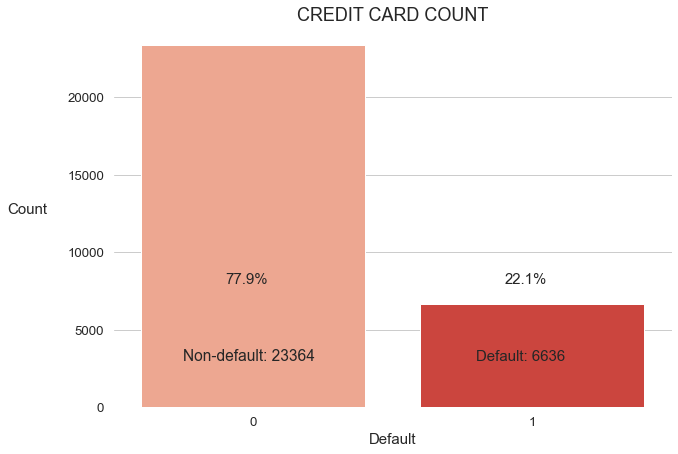

In [271]:
# Frequency of the defaults
default = df['DEFAULT'].sum() # adds up all the default cases in the df
no_default = len(df['DEFAULT']) - default  # entire dataset - default cases

# Percentage of the defaults
default_perc = round(default/len(df['DEFAULT']) * 100, 1)
no_default_perc = round(no_default/len(df['DEFAULT']) * 100, 1)

# Plotting Target
plt.figure(figsize=(10,7))  # Sets size of graph
sns.set_context('notebook', font_scale=1.2)  # Affects things like size of label, lines and other elements of the plot.

sns.countplot('DEFAULT',data=df, palette="Reds")   
plt.annotate('Non-default: {}'.format(no_default), 
             xy=(-0.25, 3000), # xy = (x dist from 0, y dist from 0)
            size=15.5)

plt.annotate('Default: {}'.format(default), 
             xy=(0.8, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 8000),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.9, 8000),size=15)
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel("Default",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40, # Adjusts distance of the title from the graph
           size=15)

plt.box(False)        # Removes the bounding area
plt.savefig('target_skew.png')

### This is an Imbalanced dataset. Perform some techniques such as:

##### 1. UnderSampling
####  2.Oversampling
####  3.Smote

## Training, Validating and Scoring all Models (SMOTE, no Scaling)

In [272]:
## SMOTE Dataset model performance evaluation

# Smote with no scaling with cross-validation in dataframe 
def baseline_report_cv_smote(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, SMOTE's the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    from imblearn.over_sampling import SMOTE # Allows for smoting if you forget to initialize it before running func
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the SMOTE data
        X_smoted, y_smoted = SMOTE(random_state=69).fit_resample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_smoted, y_smoted) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()


# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_cv_smote = df_models.drop('index', axis=1)
df_models_no_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.323917,0.237779,0.936087,0.379167,0.543338,0
1,LogisticRegression,0.654625,0.314732,0.472787,0.373744,0.589676,0
2,KNN,0.601292,0.282108,0.522157,0.366182,0.572941,0
3,DecisionTree,0.719875,0.377767,0.417492,0.396530,0.611473,0
4,RandomForest,0.812000,0.619394,0.383671,0.473787,0.658464,0
5,LinearSVC,0.637167,0.371362,0.373787,0.250877,0.544323,0


### Training, Validating and Scoring all Models (Under Sampling, no scaling)

In [273]:
def baseline_report_cv_undersampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, undersamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for undersampling if you forget to initialize it before running func
    from imblearn.under_sampling import RandomUnderSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the UnderSampled data
        X_resampled, y_resampled = RandomUnderSampler(random_state=69).fit_resample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# to concat all models
df_models = pd.concat([baseline_report_cv_undersampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_undersampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_undersampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_undersampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_undersampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_undersampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_undersample = df_models.drop('index', axis=1)
df_models_no_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.322875,0.237864,0.938697,0.379480,0.543609,0
1,LogisticRegression,0.570500,0.296207,0.684511,0.412287,0.611586,0
2,KNN,0.578000,0.283611,0.598153,0.384710,0.585175,0
3,DecisionTree,0.614500,0.311058,0.614748,0.412927,0.614634,0
4,RandomForest,0.735917,0.432930,0.637110,0.515479,0.700501,0
5,LinearSVC,0.631542,0.261944,0.368760,0.224444,0.536541,0


### Training, Validating and Scoring all Models (Over Sampling, no scaling)

In [274]:
## Oversample Dataset model performance evaluation

def baseline_report_cv_oversampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, oversamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for oversampling if you forget to initialize it before running func
    from imblearn.over_sampling import RandomOverSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the OverSampled data
        X_resampled, y_resampled = RandomOverSampler(random_state=69).fit_resample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        
   
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# to concat all models
df_models = pd.concat([baseline_report_cv_oversampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_oversampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_oversampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_oversampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_oversampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_oversampled = df_models.drop('index', axis=1)
df_models_no_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.324500,0.237330,0.931568,0.378228,0.542089,0
1,LogisticRegression,0.597917,0.305910,0.640581,0.411826,0.613055,0
2,KNN,0.599083,0.281323,0.525818,0.366433,0.572852,0
3,DecisionTree,0.724292,0.377735,0.385294,0.381388,0.602754,0
4,RandomForest,0.810250,0.595870,0.434769,0.502645,0.675681,0
5,LinearSVC,0.424000,0.258977,0.788585,0.379443,0.554215,0


## Training, Validating and Scoring all Models (SMOTE, Scaling)

In [275]:
## SMOTE Datset with Scaling for Model Performance Evaluation


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_cv_smote = df_models.drop('index', axis=1)
df_models_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.795125,0.646081,0.153656,0.244376,0.565261,0
1,LogisticRegression,0.769292,0.480905,0.578341,0.525044,0.700868,0
2,KNN,0.666292,0.353986,0.621749,0.451061,0.650287,0
3,DecisionTree,0.690000,0.345349,0.453126,0.391806,0.605101,0
4,RandomForest,0.797000,0.545097,0.480991,0.510995,0.683714,0
5,LinearSVC,0.773625,0.488669,0.566071,0.524414,0.699254,0


### Training, Validating and Scoring all Models (Under Sampling, Scaling)

In [276]:
## Undersampling & Scaled Dataset for model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_undersampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_undersampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_undersampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_undersampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_undersampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_undersampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_undersample = df_models.drop('index', axis=1)
df_models_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.788000,0.639209,0.091775,0.159637,0.538432,0
1,LogisticRegression,0.771458,0.484835,0.574082,0.525643,0.700702,0
2,KNN,0.675917,0.366091,0.641267,0.465995,0.663472,0
3,DecisionTree,0.614167,0.311265,0.617582,0.413766,0.615437,0
4,RandomForest,0.736042,0.433258,0.638788,0.516220,0.701190,0
5,LinearSVC,0.774458,0.490470,0.562067,0.523748,0.698332,0


In [277]:
## Oversampling & Scaled Dataset on Model Performance Evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_oversampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_oversampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_oversampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_oversampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_oversampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_oversampled = df_models.drop('index', axis=1)
df_models_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.794208,0.644142,0.146914,0.236537,0.562236,0
1,LogisticRegression,0.772250,0.486287,0.574678,0.526742,0.701437,0
2,KNN,0.656333,0.344930,0.620707,0.443388,0.643537,0
3,DecisionTree,0.725000,0.380142,0.390626,0.385131,0.605161,0
4,RandomForest,0.809875,0.595629,0.430179,0.499473,0.673783,0
5,LinearSVC,0.774875,0.491068,0.563128,0.524516,0.699016,0


### Model Metrics
<p>The purpose of these models will be to get effective insight into the following:

If the new customer are likely to be default or not.  
This insight can be used for credit evaluation of Customer  
Get insight into how changing the threshold, of the predictions, will effect the False Negative Rate, as well as the True   Positive Rate.  
The Math behind the metrics  
The False Negative Rate (FNR) is defined as:  

<b>FNR=FN/(FN+TN)=1−Specificity  </b>

ie, the False Negative divided by the sum of the False Negatives and the True Negatives.  
FNR describes the error of the negative cases, thus we want this value to approach 0.  
The True Posistive Rate (TPR) is defined as:  
    <b>TPR=TP/(FP+TP)=Precision  </b>
    
ie, the True Positive divided by the sum of the False Positive and the True Positives.  
TPR describes the proportion of samples correctly classified as positive, thus we want this value to approach 1.  
The FNR and TPR will be used to evaluate the general preformance of the classifications. In general, the goal is to have a FNR close to 0, while maintaining a high value of TPR.  

Receiver Operating Characteristics (ROC) is defined as:  

A comparison of the True Positive Rate and the False Positive Rate.  
the ROC at a given point is:  
    <b>ROC=TPR/FPR=(TP/TP+FN)/(FP/FP+TN)</b>  

<b>The goal is to have a ROC close to 1, as this suggests the model is getting a balanced split.  
   The ROC can help guide where the best threshold split might be.  
    The Area Under the Curve (AUC) can also be a useful metric, this is defined as:  </b>

The Area Under the Curve of the ROC.  
ie, the integral of the ROC(x)ϵD, s.t. D=0≤x≤1  
This provides and aggregated measure of preformance across all thresholds.  
ie, a general idea as to the overall potential accuracy of a model.</p>

In [281]:
df_models_no_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.376208,0.246268,0.886994,0.385433,0.644658,0
1,LogisticRegression,0.779375,0.133333,0.000360,0.000719,0.653841,0
2,KNN,0.751292,0.369322,0.180546,0.242448,0.606825,0
3,DecisionTree,0.723167,0.383832,0.405700,0.388858,0.607527,0
4,RandomForest,0.815083,0.646687,0.360253,0.460654,0.763512,0
5,LinearSVC,0.613542,0.234342,0.464356,0.146568,0.572276,0


In [282]:
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.793208,0.638098,0.141431,0.229180,0.737050,0
1,LogisticRegression,0.820292,0.679300,0.352295,0.463811,0.766627,0
2,KNN,0.793375,0.548696,0.361487,0.435719,0.704888,0
3,DecisionTree,0.723542,0.380169,0.412754,0.392596,0.613459,0
4,RandomForest,0.814208,0.640612,0.358968,0.461749,0.763217,0
5,LinearSVC,0.819458,0.670836,0.348554,0.463116,0.763038,0


In [283]:
df_models_no_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.323917,0.237779,0.936087,0.379167,0.543338,0
1,LogisticRegression,0.654625,0.314732,0.472787,0.373744,0.589676,0
2,KNN,0.601292,0.282108,0.522157,0.366182,0.572941,0
3,DecisionTree,0.719875,0.377767,0.417492,0.396530,0.611473,0
4,RandomForest,0.812000,0.619394,0.383671,0.473787,0.658464,0
5,LinearSVC,0.637167,0.371362,0.373787,0.250877,0.544323,0


In [284]:
df_models_no_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.324500,0.237330,0.931568,0.378228,0.542089,0
1,LogisticRegression,0.597917,0.305910,0.640581,0.411826,0.613055,0
2,KNN,0.599083,0.281323,0.525818,0.366433,0.572852,0
3,DecisionTree,0.724292,0.377735,0.385294,0.381388,0.602754,0
4,RandomForest,0.810250,0.595870,0.434769,0.502645,0.675681,0
5,LinearSVC,0.424000,0.258977,0.788585,0.379443,0.554215,0


In [285]:
df_models_no_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.322875,0.237864,0.938697,0.379480,0.543609,0
1,LogisticRegression,0.570500,0.296207,0.684511,0.412287,0.611586,0
2,KNN,0.578000,0.283611,0.598153,0.384710,0.585175,0
3,DecisionTree,0.614500,0.311058,0.614748,0.412927,0.614634,0
4,RandomForest,0.735917,0.432930,0.637110,0.515479,0.700501,0
5,LinearSVC,0.631542,0.261944,0.368760,0.224444,0.536541,0


In [286]:
df_models_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.795125,0.646081,0.153656,0.244376,0.565261,0
1,LogisticRegression,0.769292,0.480905,0.578341,0.525044,0.700868,0
2,KNN,0.666292,0.353986,0.621749,0.451061,0.650287,0
3,DecisionTree,0.690000,0.345349,0.453126,0.391806,0.605101,0
4,RandomForest,0.797000,0.545097,0.480991,0.510995,0.683714,0
5,LinearSVC,0.773625,0.488669,0.566071,0.524414,0.699254,0


In [287]:
df_models_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.794208,0.644142,0.146914,0.236537,0.562236,0
1,LogisticRegression,0.772250,0.486287,0.574678,0.526742,0.701437,0
2,KNN,0.656333,0.344930,0.620707,0.443388,0.643537,0
3,DecisionTree,0.725000,0.380142,0.390626,0.385131,0.605161,0
4,RandomForest,0.809875,0.595629,0.430179,0.499473,0.673783,0
5,LinearSVC,0.774875,0.491068,0.563128,0.524516,0.699016,0


In [288]:
df_models_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.788000,0.639209,0.091775,0.159637,0.538432,0
1,LogisticRegression,0.771458,0.484835,0.574082,0.525643,0.700702,0
2,KNN,0.675917,0.366091,0.641267,0.465995,0.663472,0
3,DecisionTree,0.614167,0.311265,0.617582,0.413766,0.615437,0
4,RandomForest,0.736042,0.433258,0.638788,0.516220,0.701190,0
5,LinearSVC,0.774458,0.490470,0.562067,0.523748,0.698332,0


<b>I chose to create a model, particularly in the instance of  
defaulting, where it can be more risky to enable those who are true defaulters (i.e. people who don't payback) get away with it.
<b>As a result, my model will prioritize having a greater recall -> lowering False Negatives.

<b>To correctly classify a greater number of people who are truly defaulters

<b>As a result, the Recall of the following models will be assessed (to catch more people)

<b>And the F1 score, which is a statistic that calculates an overall score that takes precision and recall into account.</b>

In [289]:
# from the above after all the sampling techniques we have the top 3 models with highest f1 score are:
#1. Logistic Regression(OverSampling, Scaling) F1-score:0.526742
#2. LinearSVC(Under Sampling, Scaling)         F1-score:0.523748
#3.RandomForest(Under Sampling, Scaling)       F1-score:0.516220

# So the next step is to tune the hyper parameters to get a better F1 score.

## Hyperparameter Tuning

### Model 1: Logistic Regression(OverSampling, Scaling)
#### GridsearchCV for Logistic regression (80% Train and 20% Split):

In [51]:
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training/validation data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_resampled, y_resampled = RandomOverSampler(random_state=69).fit_resample(X_train, y_train)

In [52]:

logreg = LogisticRegression(solver = 'liblinear')
param_grid_log = {
     'penalty' : ['l1', 'l2'],
     'C' : np.logspace(-4, 4, 20),
     'solver' : ['liblinear']},
# Create a shuffled CV fold
kf = KFold(n_splits=5, shuffle=True, random_state=1000) 
gsv1 = GridSearchCV(logreg,param_grid = param_grid_log,cv=kf,verbose=1)
best_model1 = gsv1.fit(X_resampled, y_resampled) 
logreg_pred_mms = best_model1.best_estimator_.predict(X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [53]:
print("Best HyperParameter: ",gsv1.best_params_)
print("Best Accuracy :",best_model1.score(X_test, y_test))

Best HyperParameter:  {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy : 0.7801666666666667


Confusion Matrix: 
 [[3890  769]
 [ 550  791]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      4659
           1       0.51      0.59      0.55      1341

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000

Accuracy: 0.7801666666666667
Recall/Sensitivity/True Positive Rate: 0.5898583146905294
Precision: 0.507051282051282
F1 score: 0.5453291968286798


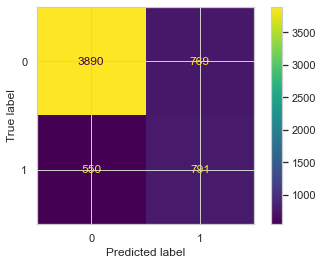

In [54]:
plot_confusion_matrix(gsv1,X_test, y_test)

conf_metr = confusion_matrix(y_test, logreg_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))
print("F1 score:",metrics.f1_score(y_test,logreg_pred_mms))

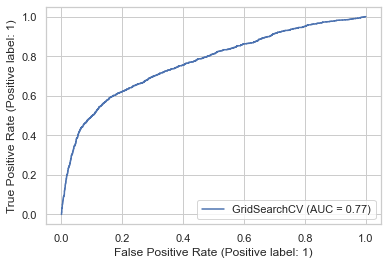

In [50]:
metrics.plot_roc_curve(best_model1,X_test, y_test)

### Model 2: Linear SVC (UnderSampling, Scaling)
#### GridsearchCV for LinearSVC (80% Train and 20% Split):

In [56]:
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training/validation data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_resampled, y_resampled = RandomUnderSampler(random_state=69).fit_resample(X_train, y_train)

In [57]:
kernels = ['rbf','linear','poly','sigmoid']
svc = SVC()
hyperParam = [{'kernel':kernels}]
kf = KFold(n_splits=5, shuffle=True, random_state=1000)
gsv = GridSearchCV(svc,hyperParam,cv=kf,verbose=1)
best_model = gsv.fit(X_resampled,y_resampled)                       # Fitting model
svc_pred_mms = best_model.best_estimator_.predict(X_test)    # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameter:  {'kernel': 'rbf'}
Best Accuracy : 0.7751666666666667


Confusion Matrix: 
 [[3854  805]
 [ 544  797]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4659
           1       0.50      0.59      0.54      1341

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000

Accuracy: 0.7751666666666667
Recall/Sensitivity/True Positive Rate: 0.5943325876211782
Precision: 0.4975031210986267
F1 score: 0.5416241930003398


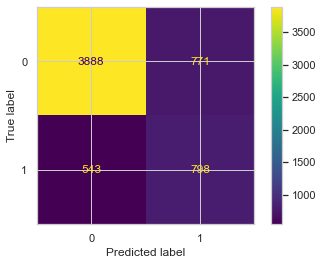

In [63]:
plot_confusion_matrix(gsv, X_test, y_test)

conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))
print("F1 score:",metrics.f1_score(y_test,svc_pred_mms))

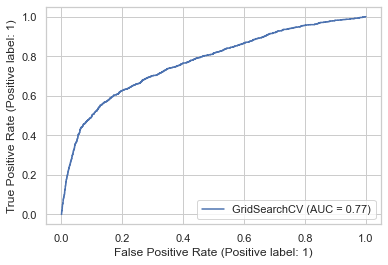

In [64]:
metrics.plot_roc_curve(best_model,X_test, y_test)

In [342]:
# In LinearSVC F1 score is improved from 0.52 to 0.54 

### Model 3: Random forest (UnderSampling, Scaling)
#### GridsearchCV for Random forest(80% Train and 20% Split):

In [343]:
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training/validation data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_resampled, y_resampled = RandomUnderSampler(random_state=69).fit_resample(X_train, y_train)

In [344]:
# RandomForest with GridSearchCV

# Prepare parameters into gridsearchcv
param_grid_random_forest = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Create a shuffled CV fold
kf = KFold(n_splits=5, shuffle=True, random_state=1000) 

# Initialize & Fit GridSearchCV on scaled data using RandomForestClassifier()
grid_randomforest_cv = (GridSearchCV(estimator = RandomForestClassifier(),
                                   param_grid = param_grid_random_forest,
                                   scoring = 'f1',  # Scoring on F1
                                   cv = kf)
                        .fit(X_resampled, y_resampled))

In [346]:
rf_pred_mms = grid_randomforest_cv.best_estimator_.predict(X_test) 

Confusion Matrix: 
 [[3611 1048]
 [ 475  866]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4659
           1       0.45      0.65      0.53      1341

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.76      6000

Accuracy: 0.7461666666666666
Recall/Sensitivity/True Positive Rate: 0.6457867263236391
Precision: 0.45245559038662486
F1 score: 0.5321044546850998


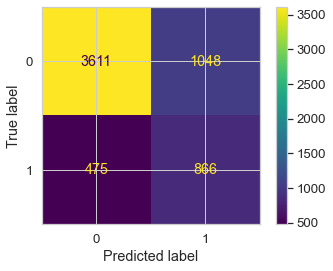

In [347]:
plot_confusion_matrix(grid_randomforest_cv, X_test, y_test)

conf_metr = confusion_matrix(y_test, rf_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))
print("F1 score:",metrics.f1_score(y_test,rf_pred_mms))

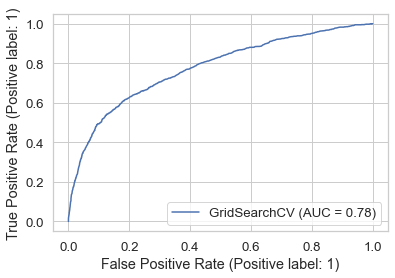

In [349]:
metrics.plot_roc_curve(grid_randomforest_cv,X_test, y_test)

In [348]:
# For Random Forest GridsearchCv f1-score improved from 0.51 to 0.53

## Future Work:

### Use Ensembling techniques to increase the F1 score

## Conclusion
### Finally we have Logistic regression with Scaling and Over sampling
####   With Metrics:
        Accuracy: 0.7801666666666667
        Recall/Sensitivity/True Positive Rate: 0.5898583146905294
        Precision: 0.507051282051282
        F1 score:  0.5453291968286798
        AOC value: 0.77
